# Exploratory Data Analysis On The 2010 World Cup In South Africa
# With Additional Dataframes To Work On

## Cleaning & modifing the data:
  1. Changing columns date type.
  2. Checking for null values and fill them, or drop if necessary.
  3. Drop unused columns.
  4. Change columns name.
  5. Creating different columns to work with the data.

## Files that are used or the analysis:
  1. FIFA World Cup csv file matches from South Africa 2010 & players statistics.
  2. Weather dataframe on the time of the tournament.
  3. Continent dataframes from the web.

## Answering the following question:
  1. ~~Which round had the most goals?~~
  2. ~~Which country has the most best average amount of audience in their games? show the top 5~~
  3. ~~What was the hottest week to play in the tournament?~~
  4. ~~Which position in the game run the most meters through the whole tournament?~~
  5. ~~Which continent had the trio staff who judged the most together?~~
  6. ~~In which stadiums did the home team average goals scored was more then the away team average goals scored and vice versa?~~
  7. ~~Does Playing a lot of minutes affect on committing a foul or run at full speed?~~
  8. ~~Which continent had the most countries from (show a choropleth map)?~~
 
## Results:
  1. Round Of 16 had the most goals.
  2. We can see that Argentina Had the most audience but by a small margin.
  3. The hottest week number was the last week of the tournament, which make since because its in the middle of the summer.
  4. The "M" position, which mean "Midfielders", ran the most meters through the whole tournament.
  5. Europe continent had the most staff trio judges in the tournament.
  6. We can see on the graph that the away team scored the most in Mbombela Stadium & the home team **only** scored half time goals in Ellis Park Stadium.
  7. We can see that in the top 10 players, sorted by foul commit & top speed in game, most players didn't play a lot of minutes, maybe because they lost energy or played foolish playes.
  8. We can see on the map that most of the countries came from Europe.

In [1]:
#Importing the libraries I'm going to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
import re
%matplotlib inline

## Cleaning The Matches Data:

In [2]:
#Reading the football dataframe & ressurecting the FIFA World Cup in South Africa tournament games from them.
df = pd.read_csv("./World Cup Matches Portfolio.csv", engine="python", encoding='ISO-8859-1')
df = df.loc[df["Year"]==2010]
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
708,2010,11 Jun 2010 - 16:00,Group A,Soccer City Stadium,Johannesburg,South Africa,1,1,Mexico,,84490.0,0,0,Ravshan IRMATOV (UZB),ILYASOV Rafael (UZB),KOCHKAROV Bakhadyr (KGZ),249722,300061454,RSA,MEX
709,2010,11 Jun 2010 - 20:30,Group A,Cape Town Stadium,Cape Town,Uruguay,0,0,France,,64100.0,0,0,NISHIMURA Yuichi (JPN),SAGARA Toru (JPN),JEONG Hae Sang (KOR),249722,300061453,URU,FRA
710,2010,12 Jun 2010 - 13:30,Group B,Port Elizabeth Stadium,Nelson Mandela Bay/Port Elizabeth,Korea Republic,2,0,Greece,,31513.0,1,0,HESTER Michael (NZL),HINTZ Jan Hendrik (NZL),MAKASINI Tevita (TGA),249722,300061459,KOR,GRE
711,2010,12 Jun 2010 - 16:00,Group B,Ellis Park Stadium,Johannesburg,Argentina,1,0,Nigeria,,55686.0,1,0,Wolfgang STARK (GER),SALVER Jan-Hendrik (GER),PICKEL Mike (GER),249722,300061460,ARG,NGA
712,2010,12 Jun 2010 - 20:30,Group C,Royal Bafokeng Sports Palace,Phokeng,England,1,1,USA,,38646.0,1,1,SIMON Carlos (BRA),HAUSMANN Altemir (BRA),BRAATZ Roberto (BRA),249722,300061466,ENG,USA


In [3]:
#Changing the date column name and the data type.
df.rename({"Datetime":"Date"}, axis=1, inplace=True)
df["Date"] = df["Date"].astype("datetime64")

In [4]:
#Checking for nulls - no nulls were found when reading the football file.
df.isna().sum()

#Creating a new column for win condition type & dropping the old non-informative win conditions column.
def win_type(game):
    if "extra time" in str(game):
        return "Extra Time Win"
    elif "penalties" in str(game):
        return "Penalties Win"
    else:
        return "Full Time Win"
    
df["Win Type"] = df["Win conditions"].apply(win_type)

df.loc[(df["Home Team Goals"]==0) & (df["Away Team Goals"]==0) &
               (df["Win Type"]=="Full Time Win"), "Win Type"] = "Draw"

df.drop("Win conditions", axis=1, inplace=True)

In [5]:
#Getting a continents dataframe from the web.
web = requests.get("https://statisticstimes.com/geography/countries-by-continents.php")
countries = pd.read_html(web.text)
countries = countries[2]
countries_with_continents = countries[["Country or Area","Continent"]]

#Merging the continents to the matches dataframe.
df_merged1 = df.merge(countries_with_continents, how="left", left_on="Home Team Name", right_on="Country or Area")

In [6]:
#Fixing Countries name
df_merged1["Home Team Name"] = df_merged1["Home Team Name"].replace({"Korea DPR":"North Korea"})
df_merged1["Away Team Name"] = df_merged1["Away Team Name"].replace({"C�te d'Ivoire":"Cote d'Ivoire"})

#Reformating the referee staff names.
ref_names = df_merged1["Referee"].str[:-5].str.title()
ref_conts = df_merged1["Referee"].str[-5:].str.upper()
df_merged1["Referee"] = ref_names+ref_conts
df_merged1["Referee"] = df_merged1["Referee"].replace({"Olegï¿½Rio Benquerenï¿½A (POR)":"Olegário Benquerença (POR)",
                                                      "Stï¿½Phane Lannoy (FRA)":"Stéphane Lannoy (FRA)"})

asst1_names = df_merged1["Assistant 1"].str[:-5].str.title()
asst1_conts = df_merged1["Assistant 1"].str[-5:].str.upper()
df_merged1["Assistant 1"] = asst1_names+asst1_conts

asst2_names = df_merged1["Assistant 2"].str[:-5].str.title()
asst2_conts = df_merged1["Assistant 2"].str[-5:].str.upper()
df_merged1["Assistant 2"] = asst2_names+asst2_conts

In [7]:
#Checking null values in the datframe and keeping them in a vriable in case I want to use them again later.
nan = df_merged1.loc[df_merged1["Continent"].isnull()]

#Filling the null continents values that went missing & drop the additional country column.
vals = {"Korea Republic":"Asia","England":"Europe","Cote d'Ivoire":"Africa","USA":"North America","North Korea":"Asia"}
df_merged1["Continent"] = df_merged1["Continent"].fillna(df_merged1["Home Team Name"].map(vals))
        
df_merged1 = df_merged1.drop("Country or Area",axis=1)
df_merged1.head()

,Year,Date,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,...,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,Win Type,Continent
0,2010,2010-06-11 16:00:00,Group A,Soccer City Stadium,Johannesburg,South Africa,1,1,Mexico,84490.0,...,0,Ravshan Irmatov (UZB),Ilyasov Rafael (UZB),Kochkarov Bakhadyr (KGZ),249722,300061454,RSA,MEX,Full Time Win,Africa
1,2010,2010-06-11 20:30:00,Group A,Cape Town Stadium,Cape Town,Uruguay,0,0,France,64100.0,...,0,Nishimura Yuichi (JPN),Sagara Toru (JPN),Jeong Hae Sang (KOR),249722,300061453,URU,FRA,Draw,South America
2,2010,2010-06-12 13:30:00,Group B,Port Elizabeth Stadium,Nelson Mandela Bay/Port Elizabeth,Korea Republic,2,0,Greece,31513.0,...,0,Hester Michael (NZL),Hintz Jan Hendrik (NZL),Makasini Tevita (TGA),249722,300061459,KOR,GRE,Full Time Win,Asia
3,2010,2010-06-12 16:00:00,Group B,Ellis Park Stadium,Johannesburg,Argentina,1,0,Nigeria,55686.0,...,0,Wolfgang Stark (GER),Salver Jan-Hendrik (GER),Pickel Mike (GER),249722,300061460,ARG,NGA,Full Time Win,South America
4,2010,2010-06-12 20:30:00,Group C,Royal Bafokeng Sports Palace,Phokeng,England,1,1,USA,38646.0,...,1,Simon Carlos (BRA),Hausmann Altemir (BRA),Braatz Roberto (BRA),249722,300061466,ENG,USA,Full Time Win,Europe


# Question 1:

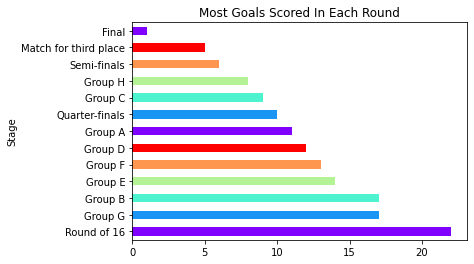

In [8]:
#Showing the most goals scored in each round
best_goals = df_merged1.groupby(["Stage","Home Team Name","Away Team Name"])[["Home Team Goals","Away Team Goals"]].sum()
best_goals["Total Goals"] = best_goals["Home Team Goals"] + best_goals["Away Team Goals"]
top5 = best_goals.groupby("Stage")["Total Goals"].sum().sort_values(ascending=False)

#Creating a color scheme for the bar chart and plot the results.
data_color = [0, 1, 2, 3, 4, 5] 
data_color = [x/max(data_color) for x in data_color]   
custom_map = plt.cm.get_cmap("rainbow") 
custom = custom_map(data_color) 

top5.plot.barh(title="Most Goals Scored In Each Round", color=custom)

# Question 2:

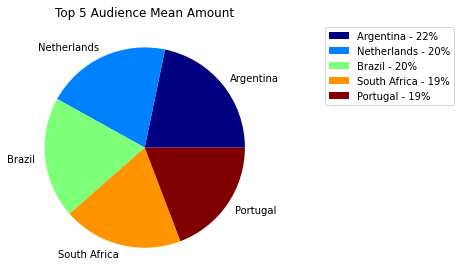

In [9]:
#Finding the top 5 countries that had the most average audience in their games and show it in a pie plot.
mask = df_merged1.groupby("Home Team Name")["Attendance"].mean().sort_values(ascending=False).head()
labels = ['{0} - {1:1.0f}%'.format(key, value) for key, value in zip(mask.keys(),100*mask.values/mask.sum())]
count_names = mask.keys()
mask.plot.pie(labels=count_names, label="" ,cmap="jet", title="Top 5 Audience Mean Amount")
plt.legend(labels, bbox_to_anchor=(1.2, 1))
plt.tight_layout()

## Adding A Weather Dataframe To The Matches Dataframe:

In [10]:
#Reading the weather dataframe and renaming the date column. 
weather = pd.read_csv("./South Africa FIFA World Cup 2010 Weather.csv", parse_dates=["Date time"])
weather.rename({"Date time":"Date"}, axis=1, inplace=True)

In [11]:
#Merging the matches dataframe with the weather dataframe & modifing the columns.
df_merged1 = df_merged1.merge(weather, how="left",left_on=df_merged1["Date"].dt.date,
                                                    right_on=weather["Date"].dt.date)

df_merged1 = df_merged1.drop(["key_0","Date_y"], axis=1).rename({"Date_x":"Date"},axis=1)

In [12]:
#Extracting a bunch of columns to work with specific weather data.
football_with_weather = df_merged1[["Date", "City", "Stadium", "Home Team Name",
                                    "Away Team Name", "Home Team Goals", "Away Team Goals", 
                                    "Win Type", "Maximum Temperature",
                                    "Minimum Temperature", "Temperature","Wind Speed", "Visibility",
                                    "Cloud Cover", "Relative Humidity", "Continent"]]

#Creating a total goals column for each game.
football_with_weather["Total Goals"] = df_merged1["Home Team Goals"] + df_merged1["Away Team Goals"]

<ipython-input-12-f625c06e3b94>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  football_with_weather["Total Goals"] = df_merged1["Home Team Goals"] + df_merged1["Away Team Goals"]


In [13]:
#Creating a new column to be a wind parameter.
def find_speed(wind):
    if wind == 0:
        return "Calm Wind"
    elif wind <= 19:
        return "Light Wind"
    elif wind > 20 and wind < 29:
        return "Moderate Wind"
    elif wind > 30 and wind < 39:
        return "Fresh Wind"
    else:
        return "Strong Wind"
    
football_with_weather["Wind Type"] = football_with_weather["Wind Speed"].apply(find_speed)

football_with_weather.head()       

<ipython-input-13-dd8e069bc74f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  football_with_weather["Wind Type"] = football_with_weather["Wind Speed"].apply(find_speed)


,Date,City,Stadium,Home Team Name,Away Team Name,Home Team Goals,Away Team Goals,Win Type,Maximum Temperature,Minimum Temperature,Temperature,Wind Speed,Visibility,Cloud Cover,Relative Humidity,Continent,Total Goals,Wind Type
0,2010-06-11 16:00:00,Johannesburg,Soccer City Stadium,South Africa,Mexico,1,1,Full Time Win,17.3,9.0,11.8,23.8,11.1,33.5,80.33,Africa,2,Moderate Wind
1,2010-06-11 20:30:00,Cape Town,Cape Town Stadium,Uruguay,France,0,0,Draw,17.3,9.0,11.8,23.8,11.1,33.5,80.33,South America,0,Moderate Wind
2,2010-06-12 13:30:00,Nelson Mandela Bay/Port Elizabeth,Port Elizabeth Stadium,Korea Republic,Greece,2,0,Full Time Win,19.2,5.7,11.7,13.2,13.2,3.4,76.71,Asia,2,Light Wind
3,2010-06-12 16:00:00,Johannesburg,Ellis Park Stadium,Argentina,Nigeria,1,0,Full Time Win,19.2,5.7,11.7,13.2,13.2,3.4,76.71,South America,1,Light Wind
4,2010-06-12 20:30:00,Phokeng,Royal Bafokeng Sports Palace,England,USA,1,1,Full Time Win,19.2,5.7,11.7,13.2,13.2,3.4,76.71,Europe,2,Light Wind


# Question 3:

In [14]:
#Creating a week column & renaming the values.
vals = {"Week 23":"Week 1","Week 24":"Week 2","Week 25":"Week 3","Week 26":"Week 4","Week 27":"Week 5"}
football_with_weather["Week Number"] = football_with_weather["Date"].dt.strftime('Week %W').replace(vals)

<ipython-input-14-2aaac638a34c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  football_with_weather["Week Number"] = football_with_weather["Date"].dt.strftime('Week %W').replace(vals)


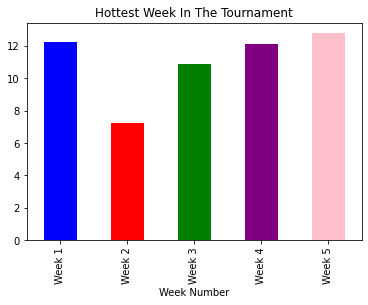

In [15]:
#Checking the hottest week to play & and ploting the results.
weeks = football_with_weather.groupby("Week Number")["Temperature"].mean()
labels = weeks.keys()
weeks.plot(kind="bar", title="Hottest Week In The Tournament", 
           color=["blue", "red", "green", "purple","pink"])

## Adding Players Statistics Dataframe To the merged Matches
## & Weather Dataframe:

In [16]:
#Reading the players statistics file and removing the columns I won't use,
#in order to merge them to the original matches dataframe.
players = pd.read_csv("./South Africa FIFA World Cup Players Statistics.csv")

players = players.drop(['MATCH', 'MATCH2','PC ', 'PA ','PC/PA', 'PR','GS', 'SG', 'S',
                        'FC', 'FS', 'DC', 'D_IN_POSS','D_NOT_IN_POSS', 'T_OPP_HALF',
                        'T_ATT_3RD', 'T_PEN_AREA', 'A_L', 'A_M', 'A_H','Attempts_on_off_target',
                        'Delivery_solo_runs_attacking3rd', 'Delivery_solo_runs_penalty_area',
                        'Tackles_gaining_the_ball', 'Tackles_not_gaining_the_ball',
                        'Tackles_suffered_losing_the_ball',
                        'Tackles_suffered_not_losing_the_ball', 'Clearances_Completed',
                        'Clearances_Attempted','Low_activity_time_spent', 'Medium_activity_time_spent',
                        'High_activity_time_spent','Low_ADC_m','Medium_ADC_m', 'High_ADC_m'],axis=1)


In [17]:
#Displaying all the column names to see all the values to work proparly.
pd.set_option('display.max_columns', None)

In [18]:
#Remvoing once more columns I won't use when I merge the dataframes and sorting the dataframe by the date.
games_and_players = df_merged1.merge(players,left_on="Home Team Initials",right_on="TEAM")
games_and_players = games_and_players.drop(['RoundID', 'MatchID','Home Team Initials', 'Away Team Initials',
                                           'Name', 'Maximum Temperature', 'Minimum Temperature','Wind Chill',
                                           'Heat Index', 'Precipitation', 'Snow', 'Snow Depth','Wind Direction',
                                           'Wind Gust','Cloud Cover', 'Relative Humidity',],axis=1)

games_and_players = games_and_players.sort_values(by="Date")

#Droping duplicate rows that appeared after merging the player statistics dataframe.
games_and_players = games_and_players.drop_duplicates(['Date','NAME'])
games_and_players.head()

,Year,Date,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,Win Type,Continent,Temperature,Wind Speed,Visibility,Conditions,PLAYER,TEAM,NAME,POS,MIN,SPRINT,MAX_SPEED,Goals_scored,Assists,Offsides,Saves,Yellow_cards,Red_card,Fouls_committed,Total_time_played_mins,Distance_covered_m,Top_Speed,Sprints
0,2010,2010-06-11 16:00:00,Group A,Soccer City Stadium,Johannesburg,South Africa,1,1,Mexico,84490.0,0,0,Ravshan Irmatov (UZB),Ilyasov Rafael (UZB),Kochkarov Bakhadyr (KGZ),Full Time Win,Africa,11.8,23.8,11.1,Partially cloudy,1,RSA,Moneeb JOSEPHS,GK,90,10.0,19.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"96'46""",5126.0,19.87,10.0
22,2010,2010-06-11 16:00:00,Group A,Soccer City Stadium,Johannesburg,South Africa,1,1,Mexico,84490.0,0,0,Ravshan Irmatov (UZB),Ilyasov Rafael (UZB),Kochkarov Bakhadyr (KGZ),Full Time Win,Africa,11.8,23.8,11.1,Partially cloudy,12,RSA,Reneilwe LETSHOLONYANE,M,57,62.0,19.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,2010,2010-06-11 16:00:00,Group A,Soccer City Stadium,Johannesburg,South Africa,1,1,Mexico,84490.0,0,0,Ravshan Irmatov (UZB),Ilyasov Rafael (UZB),Kochkarov Bakhadyr (KGZ),Full Time Win,Africa,11.8,23.8,11.1,Partially cloudy,13,RSA,Kagisho DIKGACOI,M,90,85.0,23.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2010,2010-06-11 16:00:00,Group A,Soccer City Stadium,Johannesburg,South Africa,1,1,Mexico,84490.0,0,0,Ravshan Irmatov (UZB),Ilyasov Rafael (UZB),Kochkarov Bakhadyr (KGZ),Full Time Win,Africa,11.8,23.8,11.1,Partially cloudy,20,RSA,Bongani KHUMALO,D,90,57.0,20.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,2010,2010-06-11 16:00:00,Group A,Soccer City Stadium,Johannesburg,South Africa,1,1,Mexico,84490.0,0,0,Ravshan Irmatov (UZB),Ilyasov Rafael (UZB),Kochkarov Bakhadyr (KGZ),Full Time Win,Africa,11.8,23.8,11.1,Partially cloudy,19,RSA,Surprise MORIRI,M,33,28.0,19.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Cleaning and changing some column names in order to make the dataframe more user friendly to analize.
change_names = {"Player":"Player Number","Name":"Player Name","Max_Speed":"Max Speed",
                "Yellow_Cards":"Yellow Cards","Red_Card":"Red Cards","Fouls_Committed":"Fouls Committed",
               "Total_Time_Played_Mins":"Total Time Played Mins","Distance_Covered_M":"Distance Covered M",
                "Top_Speed":"Top Speed","Goals_Scored":"Goals Scored"}

games_and_players.columns = [column.title() for column in games_and_players.columns]
games_and_players["Name"] = [str(name).title() for name in games_and_players["Name"]]
games_and_players.rename(change_names,axis=1,inplace=True)

In [20]:
#Filling the null values with 0, since the players didn't had any contribution in all the games parameters.
columns_to_fill = ["Sprint","Goals Scored","Assists","Offsides","Saves",
                   "Yellow Cards","Red Cards","Fouls Committed","Total Time Played Mins",
                  "Distance Covered M","Top Speed","Sprints"]

for col in columns_to_fill:
    games_and_players[col].fillna(0, inplace=True)

#Remove blank spaces from the values.
for col in games_and_players.columns:
    try:
        games_and_players[col] = games_and_players[col].str.strip()
    except AttributeError:
        pass

#Changing the minutes format that the players played and creating a rounded minute column out of it.
#Also, changing the new column data type into integer data type.
games_and_players["Total Time Played Mins"] = games_and_players["Total Time Played Mins"].str.split("'").str.join(":")
games_and_players["Total Time Played Mins"] = games_and_players["Total Time Played Mins"].str[:-1]

games_and_players["Round Mins"] = games_and_players["Total Time Played Mins"].str[:-1].str.split(":").str.join(".").astype(float)
games_and_players.fillna({"Total Time Played Mins":"00:00","Round Mins":0},inplace=True)

games_and_players["Round Mins"] = games_and_players["Round Mins"].astype(int)

#Finding Player names that some how got also the player number and remove them.
games_and_players["Player Name"] = games_and_players["Player Name"].str.replace("\d+","")

# Question 4:

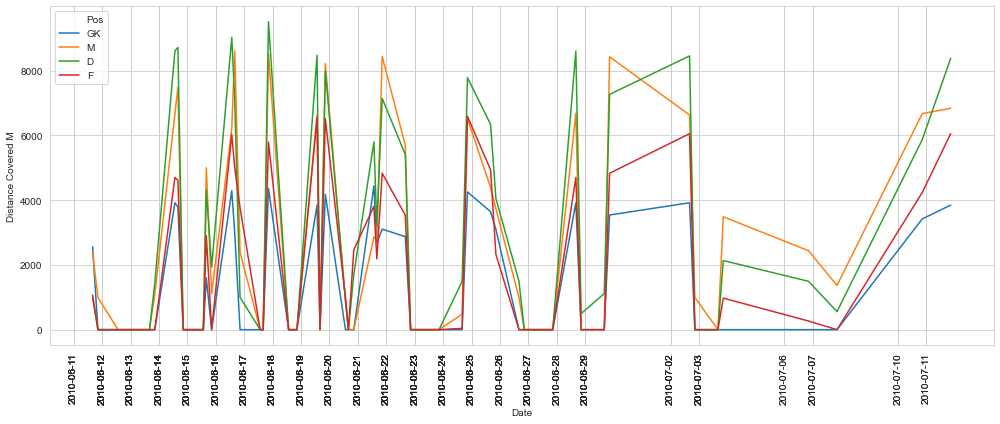

In [21]:
#Checking the position that players run there the most & plot the results.
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")

sns.lineplot(games_and_players["Date"],y=games_and_players["Distance Covered M"],
             hue=games_and_players["Pos"],ci=None,)

plt.xticks(games_and_players["Date"].dt.date[::10], rotation='vertical')
plt.tight_layout()

# Question 5:

In [22]:
#Generating another continents dataframe from the web.
another_continent_tbl = requests.get("https://gist.github.com/stevewithington/20a69c0b6d2ff846ea5d35e5fc47f26c")
continents = pd.read_html(another_continent_tbl.text)
continents = continents[0][["Continent_Name","Three_Letter_Country_Code","Country_Name"]]
continents["Country_Name"].str.split(",").str.get(0).unique()

continents = continents.dropna(how="any").rename({"Continent_Name":"Continent",
                                                  "Three_Letter_Country_Code":"Country Code"},axis=1)

In [23]:
#Extracting the refree staff countries & building a small merged dataframe of it and their following continents.
ref_count = df_merged1["Referee"].str.split(" ").str[-1::1].str.join("")
ass1_count = df_merged1["Assistant 1"].str.split(" ").str[-1::1].str.join("")
ass2_count = df_merged1["Assistant 2"].str.split(" ").str[-1::1].str.join("")

staffs = pd.concat([ref_count,ass1_count,ass2_count],axis=1)
staffs = staffs.loc[(staffs["Referee"]==staffs["Assistant 1"]) & (staffs["Referee"]==staffs["Assistant 2"])]
staffs = staffs.apply(lambda x: x.str.strip("()"))
staffs = staffs.merge(continents, how="left", left_on="Referee", right_on="Country Code")

#Filling missing continents for some countries and droping the country code column, since all the staff columns
#show the abbreviated country names.
cont_dic = {"ENG":"Europe","GER":"Europe","POR":"Europe","SUI":"Europe","URU":"South America","CHI":"South America"}
cntry_dic = {"ENG":"GBR","GER":"DEU","POR":"PRT","SUI":"CHE","URU":"URY","CHI":"CHL"}
staffs["Continent"] = staffs["Continent"].fillna(staffs["Referee"].map(cont_dic))
staffs["Country Code"] = staffs["Country Code"].fillna(staffs["Referee"].map(cntry_dic))

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

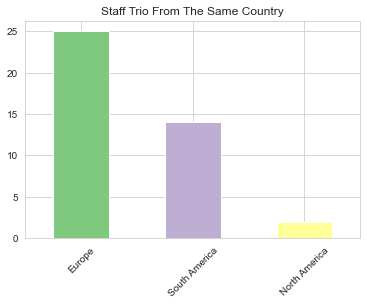

In [24]:
#Creating a color scheme for the chart and plot the results.
data_color = [0, 1, 2, 3, 4, 5] 
data_color = [x/max(data_color) for x in data_color]   
custom_map = plt.cm.get_cmap("Accent") 
custom = custom_map(data_color) 

staffs["Continent"].value_counts().plot.bar(color=custom, title="Staff Trio From The Same Country")
plt.xticks(rotation=45)

# Question 6:

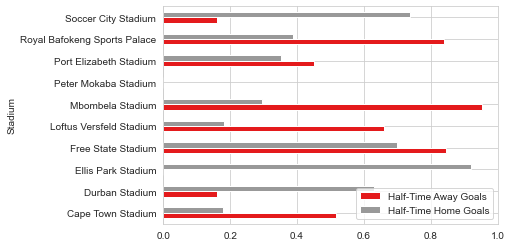

In [25]:
#Finding where did the home\away teams scored more half-time goals in each stadium, by using a pivot table
#& plot the results.
games_and_players.pivot_table(index="Stadium",
                              values=["Half-Time Home Goals","Half-Time Away Goals"]).plot.barh(cmap="Set1")


In [26]:
#Check for high correlation only between columns to analize.
correlation = games_and_players.corr()
indices = np.where(correlation > 0.6)
indices = [(correlation.index[x], correlation.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]

indices

[('Home Team Goals', 'Half-Time Home Goals'),
 ('Min', 'Sprint'),
 ('Fouls Committed', 'Distance Covered M'),
 ('Fouls Committed', 'Top Speed'),
 ('Fouls Committed', 'Sprints'),
 ('Fouls Committed', 'Round Mins'),
 ('Distance Covered M', 'Top Speed'),
 ('Distance Covered M', 'Sprints'),
 ('Distance Covered M', 'Round Mins'),
 ('Top Speed', 'Sprints'),
 ('Top Speed', 'Round Mins'),
 ('Sprints', 'Round Mins')]

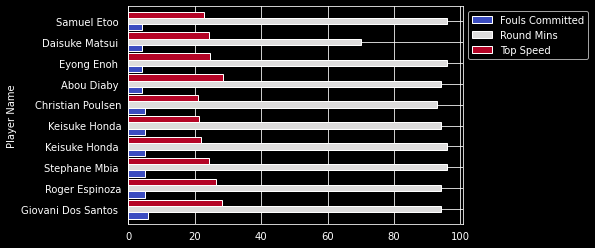

In [27]:
#Checking The minutes affects on players decisions for running and committing a foul by using a pivot table.
plt.style.use("dark_background")
pivot = games_and_players.pivot_table(index="Player Name",values=["Fouls Committed","Top Speed",
                                                   "Round Mins"]).sort_values(by=["Fouls Committed","Top Speed"],ascending=False)

#Ignoring players that had 0 in all the categories and plot the results.
pivot = pivot[(pivot != 0).all(axis=1)]
pivot.loc[pivot.index[0:10]].plot.barh(cmap="coolwarm",width=.9)
plt.legend(bbox_to_anchor=(1,1))
plt.style.use("default")

# Question 8:

In [28]:
#Once more, getting a continent dataframe but with a correct country codes for the countries.
abbv = requests.get("https://cloford.com/resources/codes/index.htm")
abbv = pd.read_html(abbv.text)
abbv = abbv[3]
abbv = abbv[["Continent","Country","ISO (3)"]]
abbv.rename({"ISO (3)":"Country Code"},axis=1,inplace=True)
abbv.head()

,Continent,Country,Country Code
0,Asia,Afghanistan,AFG
1,Europe,Albania,ALB
2,Africa,Algeria,DZA
3,Oceania,American Samoa,ASM
4,Europe,Andorra,AND


In [29]:
#Merging the full players and matches dataframe to a country code dataframe from the web.
games_and_players = games_and_players.merge(abbv,how="left", left_on="Home Team Name",
                                            right_on="Country")

#Fixing and droping unusable columns after the merge.
games_and_players.rename({"Continent_y":"Continent"},axis=1,inplace=True)
games_and_players.drop("Country",axis=1,inplace=True)
games_and_players.columns

#Changing Wrong country codes, drop another duplicated column & rename the continents merged column.
cntry_code_dic = {"England":"GBR","USA":"USA","Korea Republic":"KOR","Serbia":"SRB","North Korea":"PRK"}

games_and_players["Country Code"] = games_and_players["Country Code"].fillna(
    games_and_players["Home Team Name"].map(cntry_code_dic))

games_and_players.drop("Continent",axis=1,inplace=True)
games_and_players.rename({"Continent_x":"Continent"},axis=1,inplace=True)

In [36]:
#Shwoing a choropleth map to see where the competing countries came from to the tournament.
px.choropleth(games_and_players,locations="Country Code",hover_name="Home Team Name",
             color="Home Team Name",height=700,projection="natural earth",
             title="Countries Participation In 2010 World Cup")

# Thank You For Checking My Project! :)